![title](Header__0002_8.png)
___
# Chapter 8 - Basic Algorithmic Learning
## Segment 2 - Logistic Regression

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [4]:
%matplotlib inline

rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Logistic regression on mtcars

In [5]:
address = 'mtcars.csv'
df_cars = pd.read_csv(address)
df_cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
df_cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
cars_data = df_cars.iloc[:,[5,11]].values
cars_data_names = ['drat','carb']
print(cars_data[:5])
y = df_cars.iloc[:,9].values
print(y[:5])

[[3.9  4.  ]
 [3.9  4.  ]
 [3.85 1.  ]
 [3.08 1.  ]
 [3.15 2.  ]]
[1 1 1 0 0]


#### Checking for independence between features

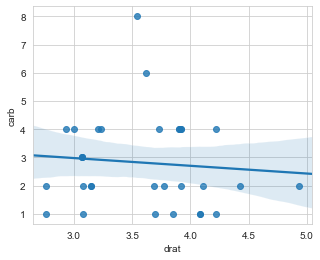

In [15]:
sb.regplot(x='drat', y='carb', data=df_cars, scatter=True)

In [16]:
drat = df_cars['drat']
carb = df_cars['carb']

spearmanr_coefficient, p_value =  spearmanr(drat, carb)
print ('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))
print(p_value)

Spearman Rank Correlation Coefficient -0.125
0.49468240297065824


#### Checking for missing values

In [17]:
df_cars.isnull().sum()

car_names    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

#### Checking that your target is binary or ordinal

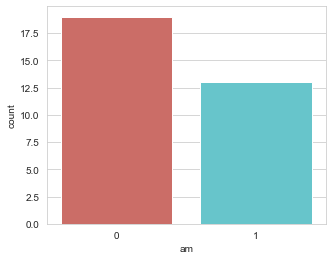

In [18]:
sb.countplot(x='am', data=df_cars, palette='hls')

#### Checking that your dataset size is sufficient

In [19]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_names    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


#### Deploying and evaluating your model

In [20]:
X = scale(cars_data)

In [21]:
LogReg = LogisticRegression()
LogReg.fit(X,y)
print(LogReg.score(X,y))

0.8125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
y_pred = LogReg.predict(X)
print(len(y_pred),y_pred)

32 [1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32

